In [7]:
from scipy.io import loadmat

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [9]:
mat = loadmat('mill.mat')

In [43]:
import scipy.io
import pandas as pd

mat = loadmat('mill.mat')
mat = {k:v for k, v in mat.items() if k[0] != '_'}

# parsing arrays in arrays in mat file  
data = {}
for k,v in mat.items():
    arr = v[0]
    for i in range(len(arr)):
        sub_arr = v[0][i]
        lst= []
        for sub_index in range(len(sub_arr)):
            vals = sub_arr[sub_index][0][0]
            lst.append(vals)
        data['row_{}'.format(i)] = lst
        
df = pd.DataFrame.from_dict(data, orient='index', columns=['case',
                                                                  'run',
                                                                  'VB', 
                                                                  'time',
                                                                  'DOC',
                                                                  "feed", 
                                                                  "material", 
                                                                  "smcAC",
                                                                 "smcDC",
                                                                  "vib_table",
                                                                  "vib_spindle",
                                                                  "AE_table",
                                                                  "AE_spindle"])
df.to_csv("mill.csv")
print("DONE")



DONE


# Cleaning the data

In [44]:
df.head(2)

,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
row_0,1,1,0.0,2,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.08728,0.103760
row_1,1,2,NaN,4,1.5,0.5,1,0.307617,0.668945,0.075684,0.301514,0.08667,0.099487


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, row_0 to row_166
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   case         167 non-null    int64  
 1   run          167 non-null    int64  
 2   VB           146 non-null    float64
 3   time         167 non-null    int64  
 4   DOC          167 non-null    float64
 5   feed         167 non-null    float64
 6   material     167 non-null    int64  
 7   smcAC        167 non-null    float64
 8   smcDC        167 non-null    float64
 9   vib_table    167 non-null    float64
 10  vib_spindle  167 non-null    float64
 11  AE_table     167 non-null    float64
 12  AE_spindle   167 non-null    float64
dtypes: float64(9), int64(4)
memory usage: 18.3+ KB


In [46]:
df.reset_index(drop=True, inplace=True)

In [47]:
df.head(5)

,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
0,1,1,0.00,2,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760
1,1,2,NaN,4,1.5,0.5,1,0.307617,0.668945,0.075684,0.301514,0.086670,0.099487
2,1,3,NaN,6,1.5,0.5,1,-0.725098,0.913086,0.083008,0.295410,0.092773,0.104980
3,1,4,0.11,7,1.5,0.5,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771
4,1,5,NaN,11,1.5,0.5,1,-0.122070,0.449219,0.107422,0.284424,0.095825,0.110474


In [48]:
df["VB"].isnull().sum()

21

In [49]:
df.dropna(axis=0, inplace=True)

In [50]:
df.corr()["VB"]

case           0.253373
run            0.625733
VB             1.000000
time           0.509063
DOC           -0.033653
feed          -0.019937
material       0.261415
smcAC         -0.059403
smcDC          0.149946
vib_table     -0.110606
vib_spindle   -0.254839
AE_table       0.011542
AE_spindle    -0.149821
Name: VB, dtype: float64

In [51]:
df.head(5)

,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
0,1,1,0.00,2,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760
3,1,4,0.11,7,1.5,0.5,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771
5,1,6,0.20,15,1.5,0.5,1,0.329590,0.683594,0.070801,0.307617,0.103760,0.120239
6,1,7,0.24,19,1.5,0.5,1,-0.578613,1.381836,0.065918,0.322266,0.090942,0.123901
7,1,8,0.29,22,1.5,0.5,1,0.300293,1.435547,0.061035,0.308838,0.092773,0.108643


In [52]:
df.reset_index(drop=True , inplace=True)

In [53]:
df.head(5)

,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
0,1,1,0.00,2,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760
1,1,4,0.11,7,1.5,0.5,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771
2,1,6,0.20,15,1.5,0.5,1,0.329590,0.683594,0.070801,0.307617,0.103760,0.120239
3,1,7,0.24,19,1.5,0.5,1,-0.578613,1.381836,0.065918,0.322266,0.090942,0.123901
4,1,8,0.29,22,1.5,0.5,1,0.300293,1.435547,0.061035,0.308838,0.092773,0.108643


In [54]:
df.drop("case", axis=1, inplace=True)

In [ ]:
df.drop("run", axis=1, inplace=True)

In [71]:
df.head(5)

,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
0,0.00,2,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760
1,0.11,7,1.5,0.5,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771
2,0.20,15,1.5,0.5,1,0.329590,0.683594,0.070801,0.307617,0.103760,0.120239
3,0.24,19,1.5,0.5,1,-0.578613,1.381836,0.065918,0.322266,0.090942,0.123901
4,0.29,22,1.5,0.5,1,0.300293,1.435547,0.061035,0.308838,0.092773,0.108643


# Visualisations

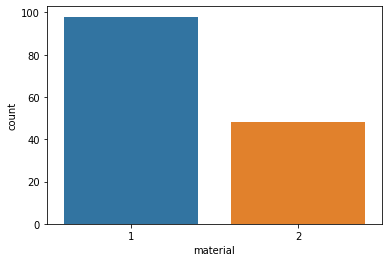

In [59]:
sns.countplot(x="material", data=df)

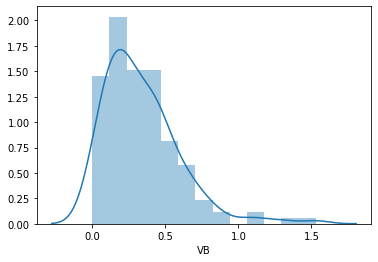

In [60]:
sns.distplot(df["VB"])

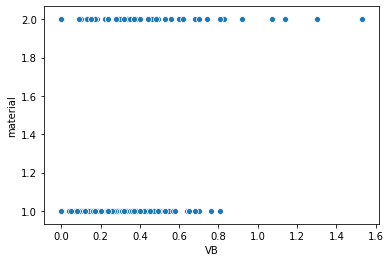

In [58]:
sns.scatterplot(x="VB" , y="material", data=df)

# Training and setting up the model

In [73]:
df.head(3)

,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
0,0.00,2,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760
1,0.11,7,1.5,0.5,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771
2,0.20,15,1.5,0.5,1,0.329590,0.683594,0.070801,0.307617,0.103760,0.120239


In [74]:
X = df.drop("VB", axis=1).values
y = df["VB"].values

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [78]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
scaler = MinMaxScaler()

In [80]:
X_train = scaler.fit_transform(X_train)

In [81]:
X_test = scaler.transform(X_test)

In [85]:
from tensorflow.kerasras.models import Sequential

In [86]:
from tensorflow.keras.layers import Dense

In [87]:
X_train.shape

(102, 10)

In [88]:
model = Sequential()

model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))

model.add(Dense(1))
model.compile (optimizer="adam" , loss="mse")


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [89]:
from tensorflow.keras.callbacks import EarlyStopping

In [90]:
early_stop = EarlyStopping(monitor='val_loss', mode="min" , verbose=1, patience=25)

In [91]:
model.fit(x=X_train , y=y_train , validation_data=(X_test,y_test), verbose=1, epochs=400 , callbacks=[early_stop])

Train on 102 samples, validate on 44 samples
Epoch 1/400
102/102 [==============================] - 1s 6ms/sample - loss: 0.1595 - val_loss: 0.1531
Epoch 2/400
102/102 [==============================] - 0s 127us/sample - loss: 0.1441 - val_loss: 0.1383
Epoch 3/400
102/102 [==============================] - 0s 147us/sample - loss: 0.1290 - val_loss: 0.1236
Epoch 4/400
102/102 [==============================] - 0s 137us/sample - loss: 0.1135 - val_loss: 0.1099
Epoch 5/400
102/102 [==============================] - 0s 137us/sample - loss: 0.0992 - val_loss: 0.0976
Epoch 6/400
102/102 [==============================] - 0s 157us/sample - loss: 0.0857 - val_loss: 0.0885
Epoch 7/400
102/102 [==============================] - 0s 255us/sample - loss: 0.0777 - val_loss: 0.0830
Epoch 8/400
102/102 [==============================] - 0s 137us/sample - loss: 0.0725 - val_loss: 0.0805
Epoch 9/400
102/102 [==============================] - 0s 176us/sample - loss: 0.0688 - val_loss: 0.0791
Epoch 10/400

Epoch 78/400
102/102 [==============================] - 0s 137us/sample - loss: 0.0130 - val_loss: 0.0275
Epoch 79/400
102/102 [==============================] - 0s 167us/sample - loss: 0.0126 - val_loss: 0.0267
Epoch 80/400
102/102 [==============================] - 0s 157us/sample - loss: 0.0124 - val_loss: 0.0257
Epoch 81/400
102/102 [==============================] - 0s 167us/sample - loss: 0.0122 - val_loss: 0.0270
Epoch 82/400
102/102 [==============================] - 0s 147us/sample - loss: 0.0117 - val_loss: 0.0267
Epoch 83/400
102/102 [==============================] - 0s 157us/sample - loss: 0.0116 - val_loss: 0.0268
Epoch 84/400
102/102 [==============================] - 0s 127us/sample - loss: 0.0112 - val_loss: 0.0294
Epoch 85/400
102/102 [==============================] - 0s 127us/sample - loss: 0.0113 - val_loss: 0.0298
Epoch 86/400
102/102 [==============================] - 0s 147us/sample - loss: 0.0110 - val_loss: 0.0293
Epoch 87/400
102/102 [========================

Epoch 155/400
102/102 [==============================] - 0s 157us/sample - loss: 0.0063 - val_loss: 0.0213
Epoch 156/400
102/102 [==============================] - 0s 157us/sample - loss: 0.0061 - val_loss: 0.0209
Epoch 157/400
102/102 [==============================] - 0s 167us/sample - loss: 0.0057 - val_loss: 0.0228
Epoch 158/400
102/102 [==============================] - ETA: 0s - loss: 0.006 - 0s 147us/sample - loss: 0.0056 - val_loss: 0.0219
Epoch 159/400
102/102 [==============================] - 0s 157us/sample - loss: 0.0055 - val_loss: 0.0210
Epoch 160/400
102/102 [==============================] - 0s 157us/sample - loss: 0.0054 - val_loss: 0.0224
Epoch 161/400
102/102 [==============================] - 0s 147us/sample - loss: 0.0054 - val_loss: 0.0233
Epoch 162/400
102/102 [==============================] - 0s 157us/sample - loss: 0.0056 - val_loss: 0.0223
Epoch 163/400
102/102 [==============================] - 0s 147us/sample - loss: 0.0052 - val_loss: 0.0190
Epoch 164/400

In [93]:
loss = pd.DataFrame(model.history.history)

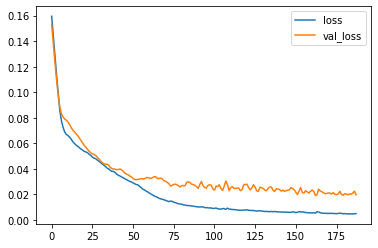

In [95]:
loss.plot()

In [96]:
model.evaluate(X_train,y_train)

102/102 [==============================] - 0s 127us/sample - loss: 0.0046


0.004558371608236841

In [97]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 182us/sample - loss: 0.0196


0.019585718781771986

# Predicting on test set

In [98]:
predictions = model.predict(X_test)

In [100]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [101]:
print(mean_squared_error(y_test,predictions))

0.019585718847434173


In [102]:
print(explained_variance_score(y_test,predictions))

0.7726160929916606


In [103]:
print(mean_absolute_error(y_test,predictions))

0.10350893833420492


In [112]:
df["VB"].describe()

count    146.000000
mean       0.337603
std        0.260528
min        0.000000
25%        0.150000
50%        0.285000
75%        0.467500
max        1.530000
Name: VB, dtype: float64

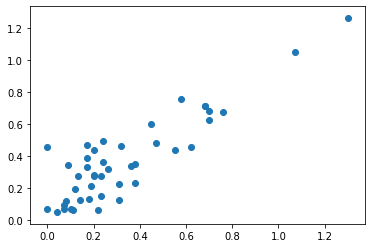

In [115]:
plt.scatter(y_test,predictions)

# Predicting on new data

In [154]:
df.head(2)

,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
0,0.00,2,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760
1,0.11,7,1.5,0.5,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771


In [156]:
new_data = df.drop("VB" , axis=1).iloc[1]

In [157]:
new_data

time           7.000000
DOC            1.500000
feed           0.500000
material       1.000000
smcAC          0.112305
smcDC          0.131836
vib_table      0.083008
vib_spindle    0.316162
AE_table       0.112915
AE_spindle     0.139771
Name: 1, dtype: float64

In [159]:
new_data = new_data.values.reshape(-1,10)

In [160]:
new_data.shape

(1, 10)

In [161]:
new_data = scaler.transform(new_data)

In [163]:
model.predict(new_data)


array([[0.06186708]], dtype=float32)

In [168]:
df.head(4)

,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
0,0.00,2,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760
1,0.11,7,1.5,0.5,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771
2,0.20,15,1.5,0.5,1,0.329590,0.683594,0.070801,0.307617,0.103760,0.120239
3,0.24,19,1.5,0.5,1,-0.578613,1.381836,0.065918,0.322266,0.090942,0.123901


In [169]:
data_2 =  df.drop("VB" , axis=1).iloc[3]

In [171]:
data_2 = data_2.values.reshape(-1,10)

In [172]:
data_2 = scaler.transform(data_2)

In [174]:
model.predict(data_2)

array([[0.19261746]], dtype=float32)

In [175]:
df["VB"].iloc[3]

0.24